# Name : Sonu Kumar Pal

# Task 1 : Prediction using Supervised ML

# Problem Statement : Predict the percentage of an student based on the no. of study hours.


## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Datasets

In [2]:
df = pd.read_csv('score.csv')
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


## Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.shape

(25, 2)

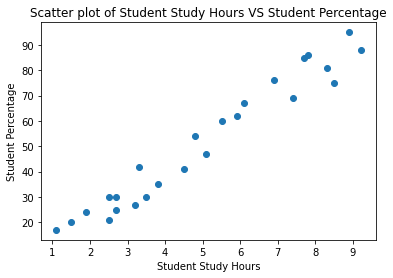

In [9]:
plt.scatter(x=df.Hours, y=df.Scores)
plt.xlabel('Student Study Hours')
plt.ylabel('Student Percentage')
plt.title('Scatter plot of Student Study Hours VS Student Percentage')
plt.show()

In [12]:
X = df.drop("Scores", axis="columns")
y = df.drop("Hours", axis="columns")
print("Shape of x =", X.shape)
print("Shape of y =", y.shape)

Shape of x = (25, 1)
Shape of y = (25, 1)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
print("shape of X_train = ",X_train.shape)
print("shape of X_test = ",X_test.shape)
print("shape of y_train = ",y_train.shape)
print("shape of y_train = ",y_test.shape)

shape of X_train =  (20, 1)
shape of X_test =  (5, 1)
shape of y_train =  (20, 1)
shape of y_train =  (5, 1)


## Select Model

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [15]:
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
lr.coef_

array([[9.56433743]])

In [17]:
lr.intercept_

array([2.70197068])

In [25]:
lr.predict([[9.2]])[0][0].round(2)

90.69

In [19]:
y_pred = lr.predict(X_test)

In [20]:
y_pred

array([[55.30582657],
       [76.34736893],
       [68.69589898],
       [82.08597139],
       [28.52568176]])

In [21]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_percentage_original","student_percentage_pred"])

,study_hours,student_percentage_original,student_percentage_pred
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


In [22]:
lr.score(X_test, y_test)

0.9238518102278777

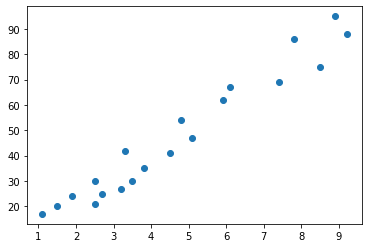

In [23]:
plt.scatter(X_train, y_train)

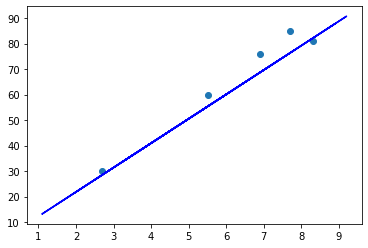

In [24]:
plt.scatter(X_test,y_test)
plt.plot(X_train, lr.predict(X_train), color="b")

In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.6422390298182545
